In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [15]:
arabi_genes = pd.read_csv('/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/Ortho_vs_gene_files/arabi_genes.csv', index_col= 0)
arabi_ortho = pd.read_csv('/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/Ortho_vs_gene_files/arabi_ortho.csv', index_col= 0)
tomato_genes = pd.read_csv('/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/Ortho_vs_gene_files/tomato_genes.csv', index_col= 0)
tomato_ortho = pd.read_csv('/data/passala/Module_paper_data/Arabi_tomato_heat_stress_comparison/Ortho_vs_gene_files/tomato_ortho.csv', index_col= 0)

In [16]:
tomato_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10009at3193,682.030124,-1.762145,0.229379,-7.682239,1.563321e-14,1.013953e-13
10092at3193,291.791121,-0.346400,0.167697,-2.065630,3.886345e-02,5.773000e-02
10147at3193,534.165225,0.848669,0.199520,4.253552,2.104064e-05,5.294969e-05
10228at3193,1040.675316,0.642265,0.147730,4.347544,1.376703e-05,3.543828e-05
10238at3193,18.554908,3.286850,0.700979,4.688945,2.746174e-06,7.748211e-06
...,...,...,...,...,...,...
9828at3193,357.097441,-0.572526,0.211989,-2.700733,6.918692e-03,1.179178e-02
9836at3193,385.019182,1.310821,0.179233,7.313512,2.602483e-13,1.522604e-12
9877at3193,448.027092,0.485289,0.151579,3.201559,1.366860e-03,2.626398e-03
9919at3193,142.244128,2.807745,0.317817,8.834475,1.005695e-18,9.142055e-18


In [17]:
trimmed_tomato_ortho = tomato_ortho.loc[tomato_ortho.index.isin(arabi_ortho.index)]
trimmed_arabi_ortho = arabi_ortho.loc[arabi_ortho.index.isin(trimmed_tomato_ortho.index)]


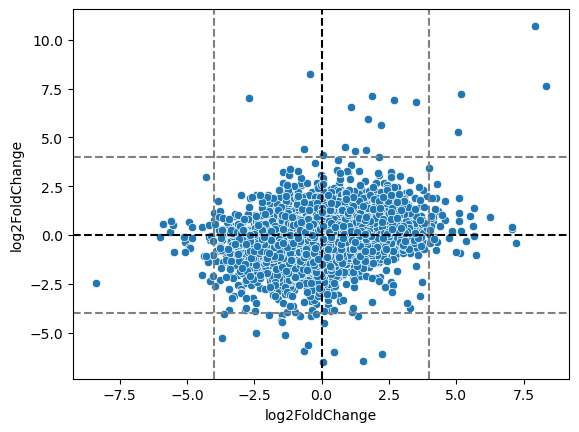

In [44]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(4, color="grey", linestyle="--")
plt.axhline(4, color="grey", linestyle="--")
plt.axvline(-4, color="grey", linestyle="--")
plt.axhline(-4, color="grey", linestyle="--")

In [19]:
trimmed_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Locus,,,,,,
10009at3193,97.125881,1.059201,0.670749,1.579132,1.143058e-01,2.124302e-01
10092at3193,1159.898019,0.120208,0.220325,0.545593,5.853457e-01,7.052904e-01
10147at3193,403.157284,0.518237,0.188914,2.743243,6.083570e-03,2.023640e-02
10228at3193,972.787765,-0.864276,0.136034,-6.353361,2.106599e-10,5.555730e-09
10488at3193,65.248400,-0.460375,0.526281,-0.874771,3.816983e-01,5.220974e-01
...,...,...,...,...,...,...
9828at3193,334.053181,-0.953968,0.282571,-3.376026,7.354093e-04,3.480580e-03
9836at3193,370.336011,0.169186,0.205690,0.822531,4.107749e-01,5.504095e-01
9877at3193,1041.826672,0.396327,0.196523,2.016693,4.372759e-02,1.004206e-01


In [20]:
all(trimmed_arabi_ortho.index == trimmed_tomato_ortho.index)

True

In [21]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = merged_result.loc[(merged_result['Tomato']>1) & (merged_result['Arabi']>1)]
all_under_1 = merged_result.loc[(merged_result['Tomato']<-1) & (merged_result['Arabi']<-1)]
discord_bottom = merged_result.loc[(merged_result['Tomato']>1) & (merged_result['Arabi']<-1)]
discord_top = merged_result.loc[(merged_result['Tomato']<-1) & (merged_result['Arabi']>1)]

In [22]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

3.128342245989305

In [23]:
discord_bottom

,Tomato,Arabi
13,1.165030,-1.022607
58,2.584199,-2.413234
123,2.169610,-1.039537
180,1.520181,-1.085204
235,1.061689,-1.273932
...,...,...
7930,1.892469,-1.446312
8091,1.304137,-1.602637
8169,1.266317,-1.334403
8439,1.433048,-1.096305


In [24]:
discord_top

,Tomato,Arabi
0,-1.762145,1.059201
132,-1.297632,1.337394
536,-1.061223,2.068076
629,-2.457792,1.004584
933,-2.211997,1.073486
...,...,...
8317,-1.316536,1.991900
8466,-2.274577,2.065459
8491,-1.250961,1.143066
8606,-2.092751,1.081795


In [25]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])
pos_thresh = 1
neg_thresh = 1
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.8030529094456559
0.8030529094456559
0.8030529094456559
0.8030529094456559


In [26]:
arabi_disconcordant_change

,Tomato,Arabi
0,-1.762145,1.059201
4,3.370811,-0.460375
13,1.165030,-1.022607
21,0.580937,1.034837
27,-0.824888,1.297984
...,...,...
8676,1.471070,0.190658
8681,2.405092,-0.705941
8694,-0.657861,1.684195
8707,1.605106,0.049256


In [27]:
tomato_any_change

,Tomato,Arabi
0,-1.762145,1.059201
1,-0.346400,0.120208
2,0.848669,0.518237
3,0.642265,-0.864276
4,3.370811,-0.460375
...,...,...
8708,-0.572526,-0.953968
8709,1.310821,0.169186
8710,0.485289,0.396327
8711,2.807745,1.669659


In [28]:
tomato_concordant_change

,Tomato,Arabi
1,-0.346400,0.120208
2,0.848669,0.518237
3,0.642265,-0.864276
5,0.023701,0.526795
6,1.398209,1.683484
...,...,...
8706,-2.124889,-0.113543
8708,-0.572526,-0.953968
8710,0.485289,0.396327
8711,2.807745,1.669659


In [29]:
arabidopsis_tomato_nm = pd.read_csv('/data/passala/OrthoDB_data/V_11_NM_with_NCBI/tomato_to_arabidopsis_ortholog_NM.csv')

In [30]:
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'arabidopsis Symbol',)
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'tomato Symbol',)
arabidopsis_tomato_nm

,tomato OrthoGene,arabidopsis OrthoGene,Orthogroup,tomato Symbol,arabidopsis Symbol
0,4081_0:002534,3702_0:006584,10009at3193,LOC101245541,AT5G42200
2,4081_0:0044e5,3702_0:001f5f,10092at3193,GLYMA_04G056600,AT2G26300
3,4081_0:0060db,3702_0:000e32,10147at3193,LOC101260909,AT1G73910
5,4081_0:001ce5,3702_0:000573,10228at3193,LOC101262196,AT1G49040
6,4081_0:00485f,3702_0:0012bf,10238at3193,LOC101260971,AT1G79120
...,...,...,...,...,...
53411,4081_0:001e35,3702_0:00121f,9828at3193,LOC101268561,AT1G74750
53413,4081_0:00467b,3702_0:0052b3,9836at3193,LOC101260957,AT5G11380
53414,4081_0:003e73,3702_0:001def,9877at3193,LOC101258079,AT2G42790
53420,4081_0:00201e,3702_0:00114d,9919at3193,LOC101252265,AT1G15440


In [31]:
arabi_genes_trimmed = arabi_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['tomato Symbol','arabidopsis Symbol']], right_on= 'arabidopsis Symbol')
arabi_genes_trimmed = arabi_genes_trimmed.drop_duplicates(subset = 'tomato Symbol', keep = False)
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
38398,279.396501,0.829771,0.279715,2.966485,3.012254e-03,1.133821e-02,LOC101253248,AT1G01020
37840,1560.891356,-0.150399,0.209296,-0.718593,4.723916e-01,6.125629e-01,AT1G01040,AT1G01040
36328,1068.595456,-0.225000,0.158336,-1.421025,1.553096e-01,2.712849e-01,LOC101264169,AT1G01050
44489,459.968316,-4.223427,0.429071,-9.843190,7.334749e-23,9.657051e-21,LOC101261662,AT1G01060
36675,1186.453103,-1.414881,0.296388,-4.773745,1.808312e-06,1.958277e-05,LOC101256355,AT1G01090
...,...,...,...,...,...,...,...,...
51889,156.922459,-1.503203,0.475221,-3.163169,1.560615e-03,6.573955e-03,LOC101253642,AT5G67350
17282,1544.917312,0.097392,0.256552,0.379618,7.042288e-01,8.036424e-01,LOC101254550,AT5G67370
34629,185.116966,-0.513197,0.321462,-1.596448,1.103887e-01,2.082768e-01,LOC101256933,AT5G67390
18490,575.977171,0.409064,0.213761,1.913656,5.566413e-02,1.221778e-01,LOC101253364,AT5G67490


In [32]:
tomato_genes_trimmed = tomato_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['tomato Symbol','arabidopsis Symbol']], right_on= 'tomato Symbol')
tomato_genes_trimmed = tomato_genes_trimmed.drop_duplicates(subset = 'arabidopsis Symbol', keep = False)
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
14614,1208.572522,-2.600665,0.154842,-16.795579,2.629260e-63,2.273878e-61,LOC101263636,AT1G14630
50585,534.934240,0.562814,0.183441,3.068088,2.154335e-03,4.103930e-03,sos1,AT2G01980
5373,459.542536,1.640208,0.187352,8.754689,2.046666e-18,1.955479e-17,LOC101263144,AT4G32250
34530,31.274656,-0.924410,0.505198,-1.829800,6.727989e-02,9.642596e-02,LOC101262550,AT1G68130
10005,394.729439,0.257145,0.187296,1.372936,1.697723e-01,2.210316e-01,LOC101261647,AT1G68080
...,...,...,...,...,...,...,...,...
22924,333.489666,-0.488295,0.216593,-2.254434,2.416890e-02,3.796822e-02,LOC101258845,AT5G10310
44592,185.535676,-2.216221,0.254426,-8.710660,3.021110e-18,2.848099e-17,LOC101264200,AT5G64700
7494,92.567027,1.392738,0.295681,4.710266,2.473941e-06,7.239471e-06,LOC101255080,AT2G28060
47950,261.883098,-0.569755,0.279886,-2.035664,4.178410e-02,6.267444e-02,LOC101245935,AT1G26180


In [33]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
14614,1208.572522,-2.600665,0.154842,-16.795579,2.629260e-63,2.273878e-61,LOC101263636,AT1G14630
50585,534.934240,0.562814,0.183441,3.068088,2.154335e-03,4.103930e-03,sos1,AT2G01980
5373,459.542536,1.640208,0.187352,8.754689,2.046666e-18,1.955479e-17,LOC101263144,AT4G32250
34530,31.274656,-0.924410,0.505198,-1.829800,6.727989e-02,9.642596e-02,LOC101262550,AT1G68130
10005,394.729439,0.257145,0.187296,1.372936,1.697723e-01,2.210316e-01,LOC101261647,AT1G68080
...,...,...,...,...,...,...,...,...
22924,333.489666,-0.488295,0.216593,-2.254434,2.416890e-02,3.796822e-02,LOC101258845,AT5G10310
44592,185.535676,-2.216221,0.254426,-8.710660,3.021110e-18,2.848099e-17,LOC101264200,AT5G64700
7494,92.567027,1.392738,0.295681,4.710266,2.473941e-06,7.239471e-06,LOC101255080,AT2G28060
47950,261.883098,-0.569755,0.279886,-2.035664,4.178410e-02,6.267444e-02,LOC101245935,AT1G26180


In [34]:
arabi_genes_trimmed = arabi_genes_trimmed.loc[arabi_genes_trimmed['arabidopsis Symbol'].isin(tomato_genes_trimmed['arabidopsis Symbol'])]
tomato_genes_trimmed = tomato_genes_trimmed.loc[tomato_genes_trimmed['tomato Symbol'].isin(arabi_genes_trimmed['tomato Symbol'])]


In [35]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
50585,534.934240,0.562814,0.183441,3.068088,2.154335e-03,4.103930e-03,sos1,AT2G01980
5373,459.542536,1.640208,0.187352,8.754689,2.046666e-18,1.955479e-17,LOC101263144,AT4G32250
34530,31.274656,-0.924410,0.505198,-1.829800,6.727989e-02,9.642596e-02,LOC101262550,AT1G68130
10005,394.729439,0.257145,0.187296,1.372936,1.697723e-01,2.210316e-01,LOC101261647,AT1G68080
43753,218.854301,-0.934817,0.226668,-4.124171,3.720722e-05,9.293481e-05,LOC101261146,AT1G48140
...,...,...,...,...,...,...,...,...
25364,503.274810,-0.067034,0.158118,-0.423951,6.716014e-01,7.236105e-01,LOC101245535,AT3G29090
22924,333.489666,-0.488295,0.216593,-2.254434,2.416890e-02,3.796822e-02,LOC101258845,AT5G10310
44592,185.535676,-2.216221,0.254426,-8.710660,3.021110e-18,2.848099e-17,LOC101264200,AT5G64700
7494,92.567027,1.392738,0.295681,4.710266,2.473941e-06,7.239471e-06,LOC101255080,AT2G28060


In [36]:
tomato_genes_trimmed = (tomato_genes_trimmed.set_index('arabidopsis Symbol')
          .reindex(arabi_genes_trimmed.set_index('arabidopsis Symbol').index)
          .reset_index()
       )

In [37]:
tomato_genes_trimmed

,arabidopsis Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol
0,AT1G01020,82.574035,1.556570,0.365328,4.260743,2.037482e-05,5.291478e-05,LOC101253248
1,AT1G01050,285.363345,-1.243455,0.301339,-4.126431,3.684369e-05,9.211423e-05,LOC101264169
2,AT1G01060,22697.287287,-5.534877,0.149593,-36.999607,1.161880e-299,2.140298e-295,LOC101261662
3,AT1G01090,2198.213499,0.275947,0.204560,1.348978,1.773441e-01,2.296398e-01,LOC101256355
4,AT1G01100,5422.194905,0.139494,0.165498,0.842876,3.992981e-01,4.661852e-01,LOC101249479
...,...,...,...,...,...,...,...,...
7681,AT5G67350,170.326147,-0.287900,0.257562,-1.117789,2.636569e-01,3.258940e-01,LOC101253642
7682,AT5G67370,6163.433566,-2.352309,0.152159,-15.459526,6.507602e-54,4.036247e-52,LOC101254550
7683,AT5G67390,469.889788,2.554874,0.351618,7.266060,3.701229e-13,2.266634e-12,LOC101256933
7684,AT5G67490,159.596825,-0.311219,0.245848,-1.265900,2.055489e-01,2.619270e-01,LOC101253364


In [40]:
arabi_genes_trimmed = arabi_genes_trimmed.reset_index()

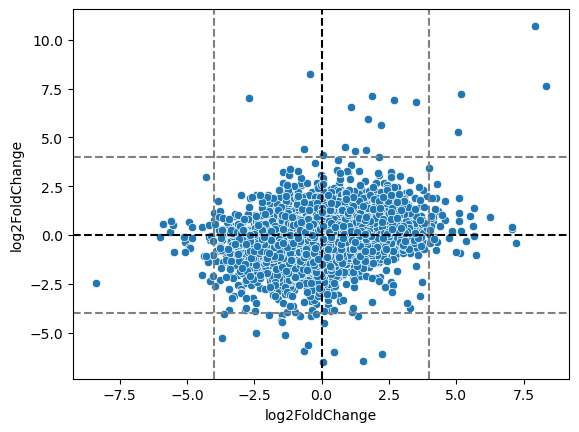

In [45]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(4, color="grey", linestyle="--")
plt.axhline(4, color="grey", linestyle="--")
plt.axvline(-4, color="grey", linestyle="--")
plt.axhline(-4, color="grey", linestyle="--")

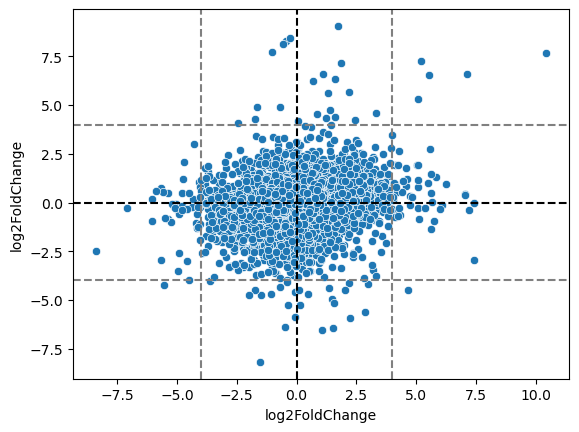

In [46]:
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(4, color="grey", linestyle="--")
plt.axhline(4, color="grey", linestyle="--")
plt.axvline(-4, color="grey", linestyle="--")
plt.axhline(-4, color="grey", linestyle="--")

In [110]:
new_merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = new_merged_result.loc[(new_merged_result['Tomato']>1) & (new_merged_result['Arabi']>1)]
all_under_1 = new_merged_result.loc[(new_merged_result['Tomato']<-1) & (new_merged_result['Arabi']<-1)]
discord_bottom = new_merged_result.loc[(new_merged_result['Tomato']>1) & (new_merged_result['Arabi']<-1)]
discord_top = new_merged_result.loc[(new_merged_result['Tomato']<-1) & (new_merged_result['Arabi']>1)]

In [113]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

3.8552631578947367

In [112]:
all_over_1

,Tomato,Arabi
11,1.694244,1.632967
34,1.049642,1.084108
42,2.699202,2.522209
67,3.016998,1.870981
101,3.035139,1.772877
...,...,...
4019,1.494675,1.169206
4036,1.015939,1.065838
4040,1.908727,1.081822
4081,2.031807,1.109585


In [111]:
all_under_1

,Tomato,Arabi
0,-3.956204,-2.580977
163,-2.414608,-1.769785
227,-1.196966,-2.626240
267,-1.961458,-1.299599
362,-1.816328,-1.183196
...,...,...
3876,-2.556446,-3.172595
3878,-1.154558,-1.226064
3987,-1.245309,-1.428683
4030,-2.717277,-1.252378


In [44]:
merged_result

,Tomato,Arabi
0,1.556570,0.829771
1,-1.243455,-0.225000
2,-5.534877,-4.223427
3,0.275947,-1.414881
4,0.139494,0.601976
...,...,...
7681,-0.287900,-1.503203
7682,-2.352309,0.097392
7683,2.554874,-0.513197
7684,-0.311219,0.409064


In [68]:
merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

pos_thresh = 0
neg_thresh = 0
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.544496487119438
0.544496487119438
0.544496487119438
0.544496487119438


In [76]:
stats.spearmanr(a=tomato_genes_trimmed['log2FoldChange'], b = arabi_genes_trimmed['log2FoldChange'] )

SignificanceResult(statistic=0.16998724263065582, pvalue=5.557071864182146e-51)

In [77]:
down = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] <= -2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
up = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] >= 2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
down_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] <= -2)
    & (arabi_genes_trimmed["padj"] <= 0.001)
]
up_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] >= 2) & (arabi_genes_trimmed["padj"] <= 0.001)
]

In [84]:
down_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] <= -2)
    & (trimmed_arabi_ortho["padj"] <= 0.001)
]
up_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] >= 2) & (trimmed_arabi_ortho["padj"] <= 0.001)]

down_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] <= -2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]
up_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] >= 2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]

In [89]:
len(up_arabi_ortho.merge(how = "inner", right_index = True, left_index= True, right = up_ortho))

32

In [86]:
up_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10488at3193,52.714341,3.370811,0.479025,7.036822,1.966743e-12,1.061378e-11
11017at3193,51.827406,3.575398,0.513246,6.966247,3.255071e-12,1.718912e-11
110288at3193,2128.608223,2.203703,0.162992,13.520321,1.186568e-41,3.920125e-40
110291at3193,2788.444150,2.899573,0.259505,11.173492,5.497629e-29,9.039025e-28
110343at3193,304.120376,3.624832,0.235374,15.400305,1.628999e-53,9.112053e-52
...,...,...,...,...,...,...
889664at3193,190.038296,2.598525,0.223327,11.635538,2.718709e-31,5.042490e-30
889948at3193,494.261923,3.276030,0.188725,17.358789,1.692554e-67,1.672307e-65
890015at3193,231.882582,2.405092,0.238361,10.090105,6.110388e-24,7.573156e-23
9557at3193,351.097368,2.153510,0.180711,11.916898,9.664018e-33,1.949771e-31


In [85]:
up_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Locus,,,,,,
112319at3193,46.429911,2.189897,0.430789,5.083459,3.706227e-07,4.818095e-06
114038at3193,1593.705104,6.541322,0.484945,13.488783,1.820817e-41,1.182138e-38
114515at3193,1533.063783,5.641658,0.328830,17.156747,5.596189e-66,1.544128e-62
114666at3193,70.035145,2.159363,0.342366,6.307183,2.841591e-10,7.213961e-09
117013at3193,6275.816200,2.783008,0.147893,18.817687,5.409497e-79,2.985231e-75
...,...,...,...,...,...,...
888729at3193,1128.091715,2.465255,0.225902,10.912954,9.995425e-28,2.081500e-25
888811at3193,68.681874,2.301733,0.515129,4.468269,7.885509e-06,6.973747e-05
889278at3193,6791.657344,2.063813,0.493041,4.185885,2.840570e-05,2.097082e-04


In [80]:
up

,arabidopsis Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol
13,AT1G01240,773.081084,3.520915,0.253350,13.897441,6.564710e-44,2.675410e-42,LOC101256522
15,AT1G01290,30.686129,3.373121,0.548537,6.149301,7.782526e-10,3.477970e-09,LOC101247025
16,AT1G01300,395.276457,3.521809,0.215713,16.326350,6.410655e-60,5.025135e-58,LOC101254425
69,AT1G02300,1966.547707,2.077465,0.166248,12.496210,7.829576e-36,2.127266e-34,LOC101251744
93,AT1G02960,32.808280,3.367007,0.571278,5.893813,3.773834e-09,1.559744e-08,LOC101258897
...,...,...,...,...,...,...,...,...
7659,AT5G66030,700.040727,2.350113,0.184598,12.730958,3.979269e-37,1.152549e-35,LOC101254258
7660,AT5G66050,688.180123,4.720131,0.313008,15.079905,2.195843e-51,1.229472e-49,LOC101247280
7672,AT5G66540,272.875924,2.031807,0.289682,7.013925,2.317239e-12,1.329363e-11,LOC101253879
7673,AT5G66590,579.079400,2.223749,0.307813,7.224353,5.034947e-13,3.052308e-12,LOC101257731


In [90]:
up_arabi

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
37410,1704.703924,2.273296,0.226605,10.031959,1.103058e-23,1.623164e-21,LOC101251744,AT1G02300
46632,244.041301,4.909129,0.676055,7.261436,3.830035e-13,1.623916e-11,LOC101256498,AT1G03070
14336,231.147693,2.522209,0.449622,5.609616,2.027762e-08,3.529637e-07,LOC101267058,AT1G03360
52742,272.881762,4.077672,0.438625,9.296489,1.451593e-20,1.559438e-18,LOC101244780,AT1G03470
38408,427.962919,2.323308,0.354202,6.559274,5.407028e-11,1.564999e-09,LOC101248918,AT1G04620
...,...,...,...,...,...,...,...,...
51095,352.905914,2.092255,0.297903,7.023265,2.167433e-12,8.127177e-11,LOC101266226,AT5G58370
43879,431.894437,3.028377,0.377604,8.019988,1.057555e-15,6.475122e-14,LOC101265201,AT5G60040
28383,1486.612708,2.066535,0.256095,8.069418,7.063405e-16,4.465245e-14,LOC101259425,AT5G61380
16939,43.017272,2.709623,0.500485,5.413991,6.163523e-08,9.602265e-07,LOC101265213,AT5G62370


In [82]:
up_arabi.merge(how = "inner", on = 'arabidopsis Symbol', right = up)

,baseMean_x,log2FoldChange_x,lfcSE_x,stat_x,pvalue_x,padj_x,tomato Symbol_x,arabidopsis Symbol,baseMean_y,log2FoldChange_y,lfcSE_y,stat_y,pvalue_y,padj_y,tomato Symbol_y
0,1704.703924,2.273296,0.226605,10.031959,1.103058e-23,1.623164e-21,LOC101251744,AT1G02300,1966.547707,2.077465,0.166248,12.496210,7.829576e-36,2.127266e-34,LOC101251744
1,231.147693,2.522209,0.449622,5.609616,2.027762e-08,3.529637e-07,LOC101267058,AT1G03360,85.080935,2.699202,0.411189,6.564390,5.224628e-11,2.619566e-10,LOC101267058
2,401.994829,3.122644,0.242442,12.879967,5.836084e-38,2.322629e-35,LOC101255183,AT1G15510,120.618031,2.120185,0.341672,6.205326,5.458366e-10,2.485135e-09,LOC101255183
3,1760.048535,4.254156,0.291552,14.591391,3.186328e-48,2.936621e-45,LOC101255185,AT1G16030,18443.123120,2.455365,0.650977,3.771815,1.620643e-04,3.705332e-04,LOC101255185
4,2471.881822,2.312580,0.490882,4.711073,2.464156e-06,2.566915e-05,LOC101258429,AT1G28330,5326.247786,3.191949,0.300080,10.636989,2.005040e-26,3.162229e-25,LOC101258429
5,69.046406,2.340967,0.540501,4.331110,1.483596e-05,1.217397e-04,LOC101257826,AT1G30960,203.148052,2.427976,0.240163,10.109688,5.004351e-24,6.788302e-23,LOC101257826
6,316.908410,2.510030,0.251559,9.977910,1.904357e-23,2.733377e-21,LOC101244367,AT1G48460,119.503515,2.786809,0.383479,7.267182,3.670655e-13,2.248657e-12,LOC101244367
7,1164.064943,2.794628,0.526201,5.310950,1.090554e-07,1.591390e-06,LOC101256536,AT1G59860,627.619958,3.931761,1.058001,3.716215,2.022296e-04,4.556350e-04,LOC101256536
8,175.944756,6.525599,0.631996,10.325375,5.410687e-25,8.772828e-23,LOC101256908,AT1G68050,636.987165,5.521131,0.434430,12.708905,5.276819e-37,1.509383e-35,LOC101256908
9,64.288553,2.746667,0.456799,6.012862,1.822759e-09,3.935676e-08,LOC101262206,AT1G68930,46.801826,5.570382,0.752398,7.403507,1.326338e-13,8.560779e-13,LOC101262206
